<a href="https://colab.research.google.com/github/Mona2104/localRepo/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import tensorflow as tf
print("TensorFlow version:",tf.__version__)

TensorFlow version: 2.15.0


In [44]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#loading the dataset to a Pandas Dataframe
input_data=pd.read_csv('/content/drive/MyDrive/Kaggle/fraudTrain.csv')

In [5]:
input_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
input_data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [7]:
#Dataset information visualisation
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
#checking the number of missing values in each column
input_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

That means there are no missing values

In [9]:
#Distribution of legit and fraudulent transaction
input_data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [10]:
input_data.shape

(1296675, 23)

In [11]:
import matplotlib.pyplot as plt

In [12]:
fraud_count=input_data['is_fraud'].value_counts()

<Axes: xlabel='is_fraud'>

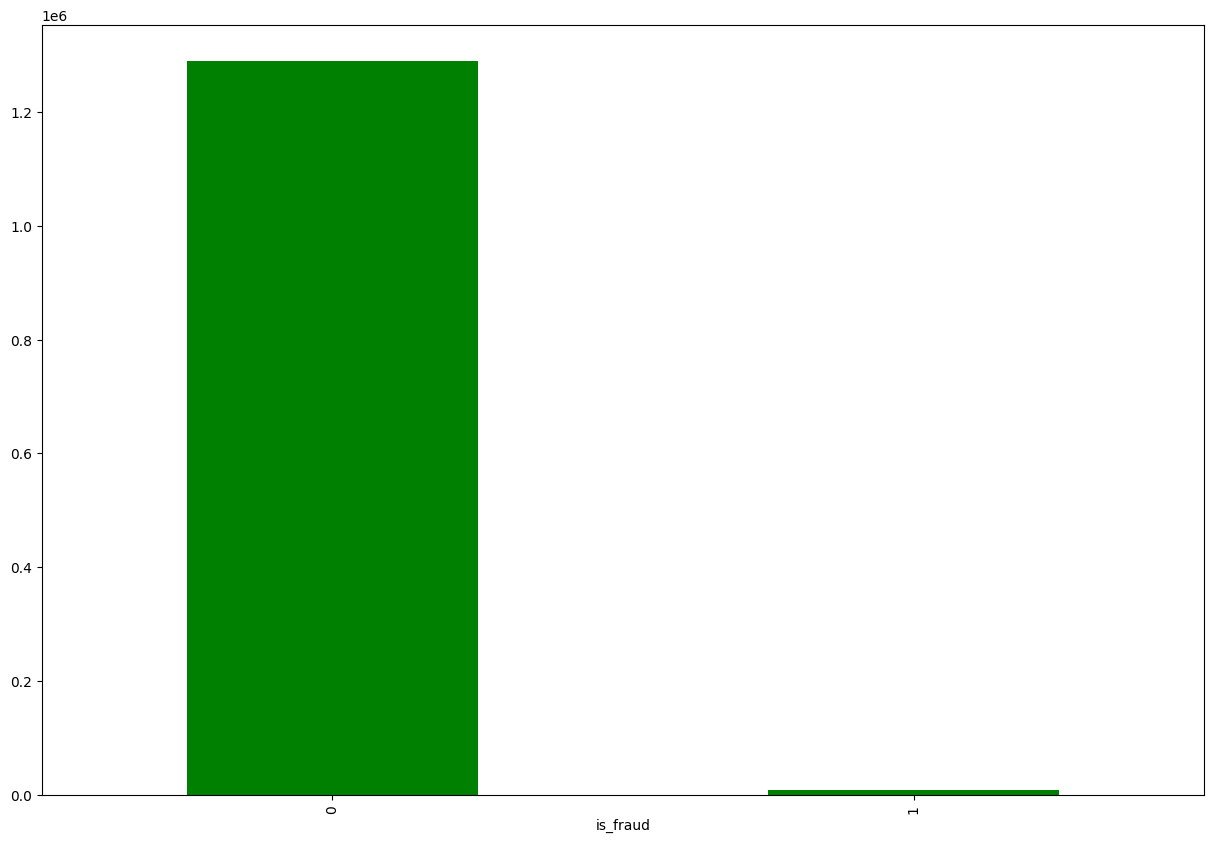

In [13]:
fraud_count.plot(kind='bar',figsize=(15,10),color='green')

In [14]:
input_data.drop(columns=['Unnamed: 0','merchant','cc_num','first','last','gender','trans_num','unix_time','street','merch_lat','merch_long','job','zip'],inplace=True)
input_data.head()

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,Moravian Falls,NC,36.0788,-81.1781,3495,1988-03-09,0
1,2019-01-01 00:00:44,grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,1978-06-21,0
2,2019-01-01 00:00:51,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,1962-01-19,0
3,2019-01-01 00:01:16,gas_transport,45.00,Boulder,MT,46.2306,-112.1138,1939,1967-01-12,0
4,2019-01-01 00:03:06,misc_pos,41.96,Doe Hill,VA,38.4207,-79.4629,99,1986-03-28,0


Now we make the necessary changes to the dataset like applying timestamp in order to make processing easier.

Lambda function:
* Python Lambda Functions are anonymous functions means that the function is without a name


Now we apply Label Encoding:
* Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

In [15]:
input_data['trans_date_trans_time']=pd.to_datetime(input_data['trans_date_trans_time'])
input_data['trans_date_trans_time']=input_data['trans_date_trans_time'].apply(lambda x:x.timestamp())
input_data['dob']=pd.to_datetime(input_data['dob'])
input_data['dob']=input_data['dob'].apply(lambda x:x.timestamp())
label_encoder = LabelEncoder()
input_data['city']=label_encoder.fit_transform(input_data['city'])
input_data['state']=label_encoder.fit_transform(input_data['state'])
input_data['category']=label_encoder.fit_transform(input_data['category'])
input_data['city']=input_data['city'].astype('float64')
input_data['state']=input_data['state'].astype('float64')
input_data['category']=input_data['category'].astype('float64')

In [16]:
input_data.dtypes

trans_date_trans_time    float64
category                 float64
amt                      float64
city                     float64
state                    float64
lat                      float64
long                     float64
city_pop                   int64
dob                      float64
is_fraud                   int64
dtype: object

In [17]:
X=input_data.drop(columns=['is_fraud'])
Y=input_data['is_fraud']

In [18]:
X

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob
0,1.546301e+09,8.0,4.97,526.0,27.0,36.0788,-81.1781,3495,573868800.0
1,1.546301e+09,4.0,107.23,612.0,47.0,48.8878,-118.2105,149,267235200.0
2,1.546301e+09,0.0,220.11,468.0,13.0,42.1808,-112.2620,4154,-250905600.0
3,1.546301e+09,2.0,45.00,84.0,26.0,46.2306,-112.1138,1939,-93744000.0
4,1.546301e+09,9.0,41.96,216.0,45.0,38.4207,-79.4629,99,512352000.0
...,...,...,...,...,...,...,...,...,...
1296670,1.592742e+09,0.0,15.56,330.0,44.0,37.7175,-112.4777,258,-255744000.0
1296671,1.592742e+09,1.0,51.70,813.0,20.0,39.2667,-77.5101,100,313718400.0
1296672,1.592742e+09,1.0,105.93,346.0,32.0,32.9396,-105.8189,899,-73872000.0
1296673,1.592742e+09,1.0,74.90,471.0,41.0,43.3526,-102.5411,1126,335404800.0


In [19]:
Y

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

Now we standardise our data:
* StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [20]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [21]:
X


array([[-1.8518249 ,  0.45285278, -0.40782607, ...,  0.65761961,
        -0.28258876,  0.82970364],
       [-1.85182288, -0.56926552,  0.23003923, ..., -2.03387012,
        -0.29366984,  0.27097443],
       [-1.85182233, -1.59138383,  0.93414872, ..., -1.60153717,
        -0.28040632, -0.67315042],
       ...,
       [ 1.76070971, -1.33585425,  0.22193025, ..., -1.13325703,
        -0.29118603, -0.3505705 ],
       [ 1.76071469, -1.33585425,  0.02837499, ..., -0.89502874,
        -0.29043427,  0.39518895],
       [ 1.76071477, -1.33585425, -0.41200532, ..., -1.71875438,
        -0.29344133,  1.25729129]])

In [22]:
X_train,_,Y_train,_=train_test_split(X,Y,random_state=42)

In [23]:
test_data=pd.read_csv('/content/drive/MyDrive/Kaggle/Genre Classification Dataset/archive (2).zip (Unzipped Files)/fraudTest.csv')

In [24]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [25]:
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [26]:
fraud_count=test_data['is_fraud'].value_counts()

<Axes: xlabel='is_fraud'>

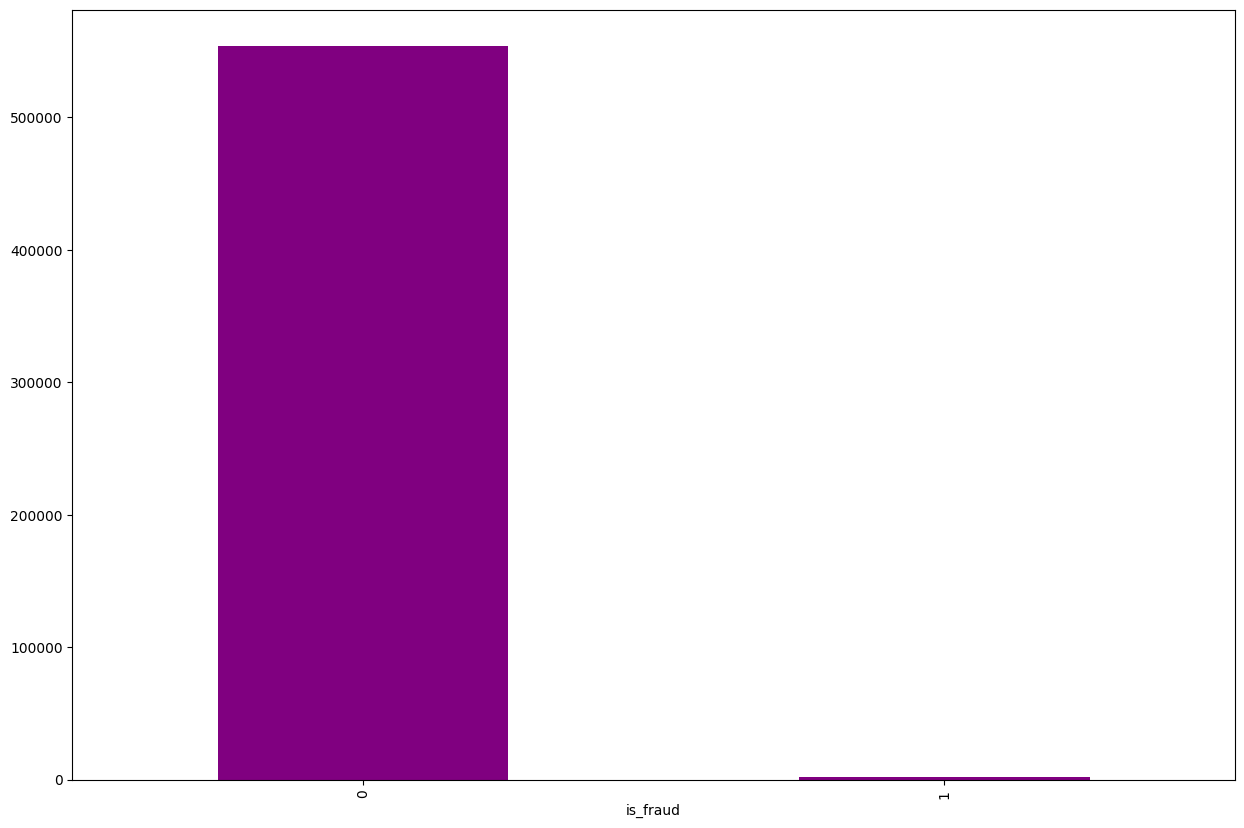

In [27]:
fraud_count.plot(kind='bar',figsize=(15,10),color='purple')

In [28]:
test_data.drop(columns=['Unnamed: 0','merchant','cc_num','first','last','gender','trans_num','unix_time','street','merch_lat','merch_long','job','zip'],inplace=True)
test_data.head()

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,is_fraud
0,2020-06-21 12:14:25,personal_care,2.86,Columbia,SC,33.9659,-80.9355,333497,1968-03-19,0
1,2020-06-21 12:14:33,personal_care,29.84,Altonah,UT,40.3207,-110.4360,302,1990-01-17,0
2,2020-06-21 12:14:53,health_fitness,41.28,Bellmore,NY,40.6729,-73.5365,34496,1970-10-21,0
3,2020-06-21 12:15:15,misc_pos,60.05,Titusville,FL,28.5697,-80.8191,54767,1987-07-25,0
4,2020-06-21 12:15:17,travel,3.19,Falmouth,MI,44.2529,-85.0170,1126,1955-07-06,0


In [29]:
test_data['trans_date_trans_time']=pd.to_datetime(test_data['trans_date_trans_time'])
test_data['trans_date_trans_time']=test_data['trans_date_trans_time'].apply(lambda x:x.timestamp())
test_data['dob']=pd.to_datetime(test_data['dob'])
test_data['dob']=test_data['dob'].apply(lambda x:x.timestamp())
label_encoder = LabelEncoder()
test_data['city']=label_encoder.fit_transform(test_data['city'])
test_data['state']=label_encoder.fit_transform(test_data['state'])
test_data['category']=label_encoder.fit_transform(test_data['category'])
test_data['city']=test_data['city'].astype('float64')
test_data['state']=test_data['state'].astype('float64')
test_data['category']=test_data['category'].astype('float64')

In [30]:
X_test_initial=test_data.drop(columns=['is_fraud'])
Y_test_initial=test_data['is_fraud']

In [31]:
X_test_initial

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob
0,1.592742e+09,10.0,2.86,157.0,39.0,33.9659,-80.9355,333497,-56419200.0
1,1.592742e+09,10.0,29.84,16.0,43.0,40.3207,-110.4360,302,632534400.0
2,1.592742e+09,5.0,41.28,61.0,33.0,40.6729,-73.5365,34496,25315200.0
3,1.592742e+09,9.0,60.05,764.0,8.0,28.5697,-80.8191,54767,554169600.0
4,1.592742e+09,13.0,3.19,247.0,21.0,44.2529,-85.0170,1126,-457315200.0
...,...,...,...,...,...,...,...,...,...
555714,1.609459e+09,5.0,43.77,443.0,23.0,40.4931,-91.8912,519,-122515200.0
555715,1.609459e+09,7.0,111.84,401.0,42.0,29.0393,-95.4401,28739,946252800.0
555716,1.609459e+09,7.0,86.88,104.0,46.0,46.1966,-118.9017,3684,375840000.0
555717,1.609459e+09,13.0,7.99,476.0,12.0,44.6255,-116.4493,129,-127699200.0


In [32]:
Y_test_initial

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

In [33]:
scalar=StandardScaler()
X_test_initial=scaler.fit_transform(X_test_initial)

#Models
Tensorflow model(custom)

In [34]:
model=Sequential([
    Dense(32,activation='relu'),
    Dense(64,activation='relu'),
    Dense(128,activation='relu'),
    Dense(256,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [35]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
history=model.fit(X_train,Y_train,epochs=15,batch_size=1024,validation_split=0.2)

Epoch 1/15
760/760 [==============================] - 14s 16ms/step - loss: 0.0307 - accuracy: 0.9931 - val_loss: 0.0191 - val_accuracy: 0.9948
Epoch 2/15
760/760 [==============================] - 12s 15ms/step - loss: 0.0178 - accuracy: 0.9952 - val_loss: 0.0161 - val_accuracy: 0.9957
Epoch 3/15
760/760 [==============================] - 9s 12ms/step - loss: 0.0161 - accuracy: 0.9957 - val_loss: 0.0147 - val_accuracy: 0.9960
Epoch 4/15
760/760 [==============================] - 11s 15ms/step - loss: 0.0149 - accuracy: 0.9959 - val_loss: 0.0140 - val_accuracy: 0.9959
Epoch 5/15
760/760 [==============================] - 14s 19ms/step - loss: 0.0139 - accuracy: 0.9960 - val_loss: 0.0133 - val_accuracy: 0.9960
Epoch 6/15
760/760 [==============================] - 11s 15ms/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.0118 - val_accuracy: 0.9964
Epoch 7/15
760/760 [==============================] - 9s 12ms/step - loss: 0.0120 - accuracy: 0.9964 - val_loss: 0.0113 - val_accuracy: 0

Logistic Regression

In [37]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [38]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

**Models Evaluation and prediction**
* Tensorflow model:

In [42]:
loss,accuracy=model.evaluate(X_test_initial,Y_test_initial)
print(f'\n Accuracy:{accuracy}')
y_pred_tf=(model.predict(X_test_initial)>0.5).astype("int32")

17367/17367 [==============================] - 45s 3ms/step - loss: 0.0085 - accuracy: 0.9974

 Accuracy:0.9973763823509216
17367/17367 [==============================] - 42s 2ms/step


This calculates the predicted probabilities of the model and compares with the threshold value of 0.5. and astype converts into integer.

* Logistic Regression

In [46]:
y_pred_log_reg=log_reg.predict(X_test_initial)
print(f'\n Accuracy:{accuracy_score(Y_test_initial,y_pred_log_reg)}')
print(classification_report(Y_test_initial,y_pred_log_reg))


 Accuracy:0.9954707325104954
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



The End!